In [1]:
from numpy import pi as PI
from scipy.stats import skew, kurtosis
from scipy.integrate import quad
from scipy.spatial.distance import pdist, cdist, squareform

import scipy
import random
import pandas as pd
import numpy as np
import ringity as rng
import networkx as nx
import matplotlib.pyplot as plt

In [14]:
plt.style.use("fivethirtyeight")

### Sample distribution

In [2]:
beta = np.random.uniform()

kapp = np.tan(PI/2*beta)
lamb = 1/kapp

In [3]:
N = 2**12

delays = rng.get_delays(N, param=beta)

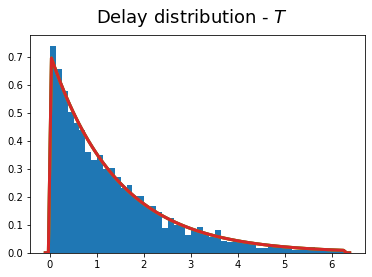

In [4]:
x = np.linspace(-0.1,2*np.pi+0.1,100)

plt.hist(delays, density=True, bins=50);

plt.plot(x, rng.pdf_delay(x, lamb, 'rate') , linewidth=3)
plt.plot(x, rng.pdf_delay(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_delay(x, beta, 'delay'), linewidth=3)

plt.suptitle("Delay distribution - $T$", fontsize=18);

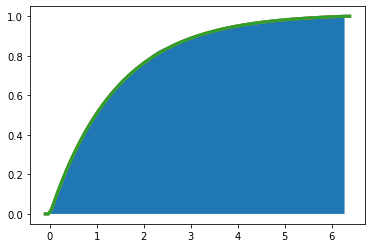

In [5]:
cdf_x = np.sort(delays)
cdf_y = np.arange(len(delays))/len(delays)

plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_delay(x, lamb, 'rate' ), linewidth=3)
plt.plot(x, rng.cdf_delay(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_delay(x, beta, 'delay'), linewidth=3)

### Absolute distance

In [6]:
abs_dists = pdist(delays.reshape(-1,1))

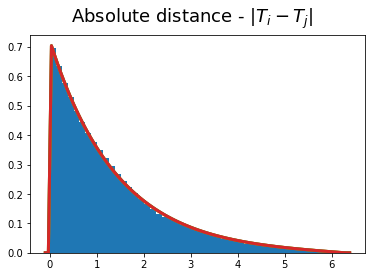

In [7]:
x = np.linspace(-0.1,2*np.pi+0.1,100)

plt.hist(abs_dists, density=True, bins=50);

plt.plot(x, rng.pdf_absolute_distance(x, lamb, 'rate') , linewidth=3)
plt.plot(x, rng.pdf_absolute_distance(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_absolute_distance(x, beta, 'delay'), linewidth=3)

plt.suptitle("Absolute distance - $|T_i - T_j|$", fontsize=18);

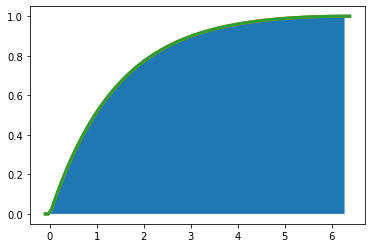

In [8]:
cdf_x = np.sort(abs_dists)
cdf_y = np.arange(len(abs_dists))/len(abs_dists)

plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_absolute_distance(x, lamb, 'rate' ), linewidth=3)
plt.plot(x, rng.cdf_absolute_distance(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_absolute_distance(x, beta, 'delay'), linewidth=3)

### Circular distance

In [9]:
circ_dists = rng.delays_to_distances(delays)

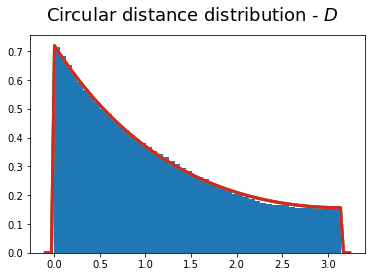

In [10]:
x = np.linspace(-0.1,np.pi+0.1,100)

plt.hist(circ_dists, density=True, bins=50);

plt.plot(x, rng.pdf_circular_distance(x, lamb, 'rate') , linewidth=3)
plt.plot(x, rng.pdf_circular_distance(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_circular_distance(x, beta, 'delay'), linewidth=3)

plt.suptitle("Circular distance distribution - $D$", fontsize=18);

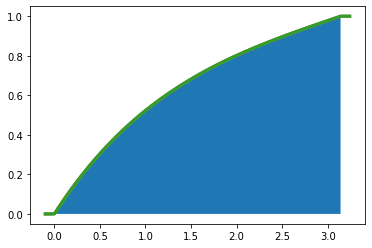

In [11]:
cdf_x = np.sort(circ_dists)
cdf_y = np.arange(len(circ_dists))/len(circ_dists)

plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_circular_distance(x, lamb, 'rate' ), linewidth=3)
plt.plot(x, rng.cdf_circular_distance(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_circular_distance(x, beta, 'delay'), linewidth=3)

### Similarity

In [12]:
a = np.random.uniform(0, 0.5)
print(a)

simis = rng.distances_to_similarities(dists=circ_dists, a=a)

0.11992021892730204


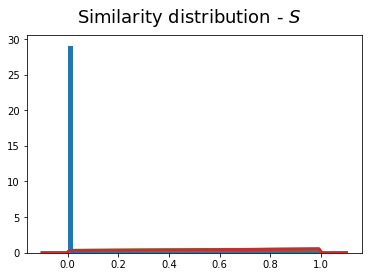

In [13]:
x = np.linspace(-0.1,1+0.1,100)

plt.hist(simis, density=True, bins=50);

plt.plot(x, rng.pdf_similarity(x, lamb, a, 'rate') , linewidth=3)
plt.plot(x, rng.pdf_similarity(x, kapp, a, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_similarity(x, beta, a, 'delay'), linewidth=3)

plt.suptitle("Similarity distribution - $S$", fontsize=18);

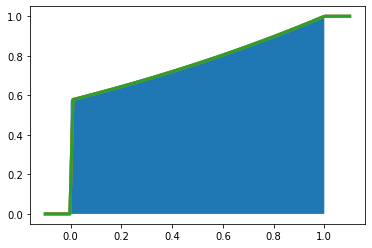

In [14]:
cdf_x = np.sort(simis)
cdf_y = np.arange(len(simis))/len(simis)

plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_similarity(x, lamb, a, 'rate' ), linewidth=3)
plt.plot(x, rng.cdf_similarity(x, kapp, a, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_similarity(x, beta, a, 'delay'), linewidth=3)

In [15]:
print(np.mean(simis))

0.23132349542491193


In [16]:
print(rng.mean_similarity(lamb, a, 'rate'))
print(rng.mean_similarity(kapp, a, 'shape'))
print(rng.mean_similarity(beta, a, 'delay'))

0.23005749147084764
0.23005749147084764
0.23005749147084764


### Probability

In [17]:
rho = np.random.uniform(0,0.5)
mu_S = rng.mean_similarity(lamb, a)

assert rho <= mu_S
k = rho/mu_S

probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=beta, parameter_type='delay')

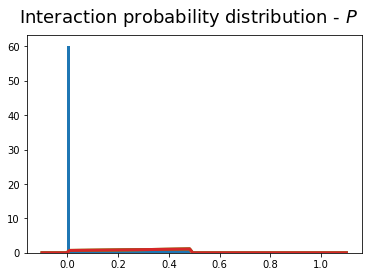

In [18]:
x = np.linspace(-0.1,1+0.1,100)

plt.hist(probs, density=True, bins=50);

plt.plot(x, rng.pdf_probability(x, lamb, a, rho, 'rate'), linewidth=3)
plt.plot(x, rng.pdf_probability(x, kapp, a, rho, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_probability(x, beta, a, rho, 'delay'), linewidth=3)

plt.suptitle("Interaction probability distribution - $P$", fontsize=18);

AssertionError: Not implemented yet!

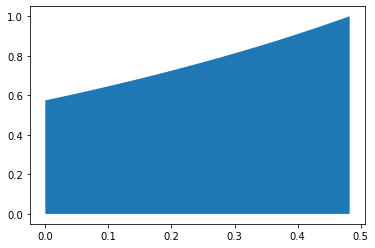

In [19]:
cdf_x = np.sort(probs)
cdf_y = np.arange(len(k*simis))/len(k*simis)

plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_probability(x, lamb, a, rho, 'rate' ), linewidth=3)
plt.plot(x, rng.cdf_probability(x, kapp, a, rho, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_probability(x, beta, a, rho, 'delay'), linewidth=3)

### density

In [22]:
N = 2**10
rho = np.random.uniform()
beta = np.random.uniform()
a = np.random.uniform(0,0.5)

obs_rhos = []

for i in range(100):
    delas = rng.get_delays(N, beta)
    dists = rng.delays_to_distances(delas)
    simis = rng.distances_to_similarities(dists, a=a)
    probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=beta, parameter_type = 'delay')
    obs_rhos.append(np.mean(probs))
    
print(np.mean(obs_rhos))

0.15572438117734622


In [23]:
rho

0.15575411485062796

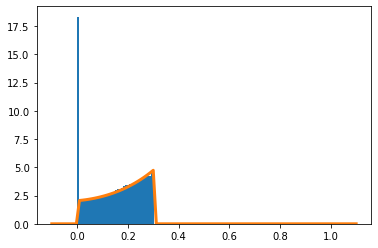

In [24]:
x = np.linspace(-0.1,1+0.1,100)

plt.hist(probs, density=True, bins=50);

plt.plot(x, rng.pdf_probability(x, beta, a, rho, 'delay'), linewidth=3)

### Conditional absolute distance

In [25]:
beta = np.random.uniform()
kapp = np.tan(PI/2*beta)
lamb = 1/kapp

print(beta)

0.6975641707811632


In [26]:
N = 2**17
positions = rng.get_positions(N, beta=beta)
delas = rng.get_delays(N, param = beta)

In [27]:
theta, = random.sample(list(delays), 1)

In [28]:
abs_dists = np.abs(delas-theta)

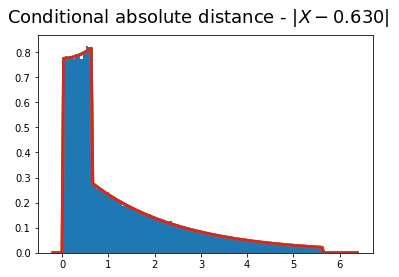

In [29]:
x = np.linspace(-0.2, 2*PI+0.1, 200)

plt.hist(abs_dists, density=True, bins=100);

plt.plot(x, rng.pdf_conditional_absolute_distance(x, theta, lamb, 'rate'), linewidth=3)
plt.plot(x, rng.pdf_conditional_absolute_distance(x, theta, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_conditional_absolute_distance(x, theta, beta, 'delay'), linewidth=3)

plt.suptitle(rf"Conditional absolute distance - $|X-{theta:.3f}|$ ", fontsize=18);

In [30]:
cdf_x = np.sort(abs_dists)
cdf_y = np.arange(N)/N

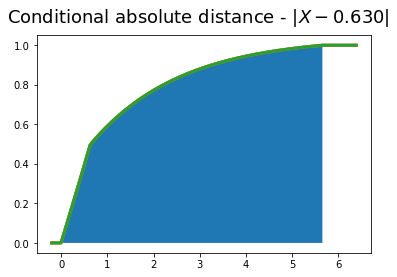

In [31]:
plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_conditional_absolute_distance(x, theta, lamb, 'rate'), linewidth=3)
plt.plot(x, rng.cdf_conditional_absolute_distance(x, theta, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_conditional_absolute_distance(x, theta, beta, 'delay'), linewidth=3)

plt.suptitle(rf"Conditional absolute distance - $|X-{theta:.3f}|$", fontsize=18);

### Conditional circular distance

In [32]:
circ_dists = np.minimum(abs_dists, 2*PI-abs_dists)

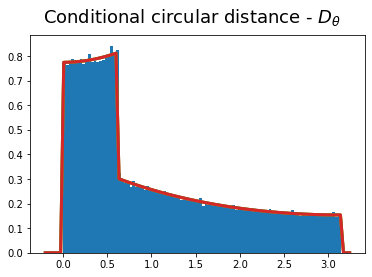

In [33]:
x = np.linspace(-0.2,PI+0.1,100)

plt.hist(circ_dists, density=True, bins=100);

plt.plot(x, rng.pdf_conditional_circular_distance(x, theta, lamb, 'rate' ), linewidth=3)
plt.plot(x, rng.pdf_conditional_circular_distance(x, theta, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_conditional_circular_distance(x, theta, beta, 'delay'), linewidth=3)

plt.suptitle(r"Conditional circular distance - $D_{\theta}$", fontsize=18);

In [34]:
cdf_x = np.sort(circ_dists)
cdf_y = np.arange(N)/N

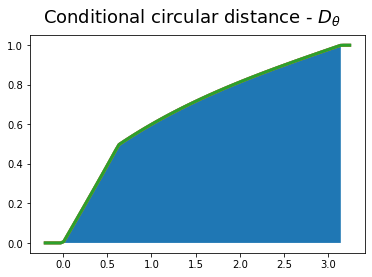

In [35]:
plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_conditional_circular_distance(x, theta, lamb, 'rate'), linewidth=3)
plt.plot(x, rng.cdf_conditional_circular_distance(x, theta, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_conditional_circular_distance(x, theta, beta, 'delay'), linewidth=3)

plt.suptitle(r"Conditional circular distance - $D_{\theta}$", fontsize=18);

### Conditional similarity

In [36]:
a = np.random.uniform(0,0.5)

simis = rng.distances_to_similarities(circ_dists, a=a)

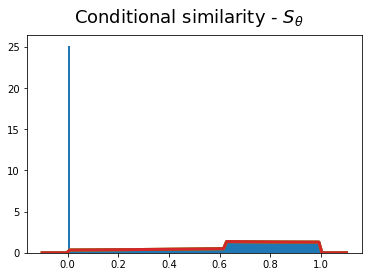

In [37]:
x = np.linspace(-0.1,1+0.1,100)

plt.hist(simis, density=True, bins=100);

plt.plot(x, rng.pdf_conditional_similarity(x, theta, a, lamb, 'rate' ), linewidth=3)
plt.plot(x, rng.pdf_conditional_similarity(x, theta, a, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_conditional_similarity(x, theta, a, beta, 'delay'), linewidth=3)

plt.suptitle(r"Conditional similarity - $S_{\theta}$", fontsize=18);

AssertionError: Not implemented yet!

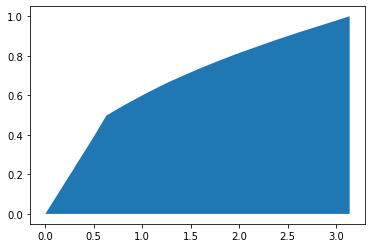

In [38]:
#  Not implemented yet!

cdf_x = np.sort(circ_dists)
cdf_y = np.arange(N)/N

plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_conditional_similarity(x, a, theta, lamb, 'rate'), linewidth=3)
plt.plot(x, rng.cdf_conditional_similarity(x, a, theta, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_conditional_similarity(x, a, theta, beta, 'delay'), linewidth=3)


plt.suptitle(r"Conditional similarity - $S_{\theta}$", fontsize=18);

### Conditional probability

In [39]:
rho = np.random.uniform(0,0.1)
mu_S = rng.mean_similarity(lamb, a)

assert rho <= mu_S
k = rho/mu_S

probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=lamb)

print(rho)
print(np.mean(rho))

0.033608998153716686
0.033608998153716686


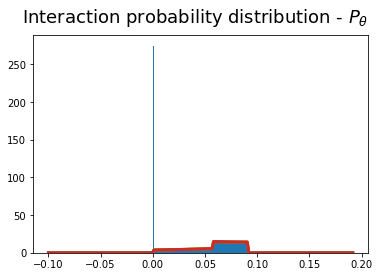

In [40]:
x = np.linspace(-0.1, k+0.1, 200)

plt.hist(probs, density=True, bins=100);
plt.plot(x, rng.pdf_conditional_probability(x, theta, lamb, a, rho, 'rate'), linewidth=3)
plt.plot(x, rng.pdf_conditional_probability(x, theta, kapp, a, rho, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_conditional_probability(x, theta, beta, a, rho, 'delay'), linewidth=3)

plt.suptitle(r"Interaction probability distribution - $P_{\theta}$", fontsize=18);

### Degree counts

In [41]:
N = 2**12
rho = np.random.uniform(0,0.5)
beta = np.random.uniform()
a = np.random.uniform(0,0.5)

#### Single node

In [145]:
for i in range(9):
    if i == 0:
        theta = 0.001
    else:
        theta = np.random.uniform(0, 2*PI)

    obs_degs = []

    for i in range(2**11):
        delas = rng.get_delays(N, beta)
        abs_dists  = np.abs(delas-theta)
        circ_dists = np.minimum(abs_dists, 2*PI-abs_dists)
        simis = rng.distances_to_similarities(circ_dists, a=a)
        probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=beta, parameter_type = 'delay')
        obs_degs.append(np.mean(probs*N))

    print(f"node position = {theta}")
    print(45*"-")
    print("Average observed degree: " , np.mean(obs_degs))
    print("        Expected degree: ", N*rng.expected_node_degree(theta, 
                                                              a = a, 
                                                              rho = rho, 
                                                              parameter = beta, 
                                                              parameter_type = 'delay'))
    print()

node position = 0.001
---------------------------------------------
Average observed degree:  46.4664407082828
        Expected degree:  46.34195162018403

node position = 3.4160060489580104
---------------------------------------------
Average observed degree:  9.730565704597465
        Expected degree:  9.731942827287883

node position = 1.1437215284376605
---------------------------------------------
Average observed degree:  46.37840827168851
        Expected degree:  46.341257189816496

node position = 3.1442739850989745
---------------------------------------------
Average observed degree:  11.66354469079123
        Expected degree:  11.728723304437981

node position = 0.6797589022651115
---------------------------------------------
Average observed degree:  63.678355449547944
        Expected degree:  63.731889462174024

node position = 0.6619916009720357
---------------------------------------------
Average observed degree:  64.51601127699288
        Expected degree:  64.514354

In [43]:
N

4096

In [44]:
probs.shape

(4096,)

In [47]:
N = 2**10
rho = np.random.uniform(0,0.5)
beta = np.random.uniform()
a = np.random.uniform(0,0.5)

In [29]:
for i in range(9):
    if i == 0:
        theta = 0.001
    else:
        theta = np.random.uniform(0, 2*PI)

    obs_degs = []

    for i in range(2**13):
        delas = rng.get_delays(N-1, beta)
        abs_dists  = np.abs(delas-theta)
        circ_dists = np.minimum(abs_dists, 2*PI-abs_dists)
        simis = rng.distances_to_similarities(circ_dists, a=a)
        probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=beta, parameter_type = 'delay')
        deg_dist = np.sum(probs > np.random.uniform(size=N-1))
        obs_degs.append(deg_dist)

    print(f"node position = {theta}")
    print(45*"-")
    print("Average observed degree: " , np.mean(obs_degs))
    print("        Expected degree: ", (N-1)*rng.expected_node_degree(theta, 
                                                              a = a, 
                                                              rho = rho, 
                                                              parameter = beta, 
                                                              parameter_type = 'delay'))
    print()

node position = 0.001
---------------------------------------------
Average observed degree:  197.6278076171875
        Expected degree:  197.54161392267017

node position = 5.65595784979718
---------------------------------------------
Average observed degree:  140.7205810546875
        Expected degree:  140.75498376508418

node position = 3.3650742596342784
---------------------------------------------
Average observed degree:  123.789794921875
        Expected degree:  123.95168725474659

node position = 4.153651542684035
---------------------------------------------
Average observed degree:  90.6348876953125
        Expected degree:  90.88221616008063

node position = 0.02414530573015134
---------------------------------------------
Average observed degree:  199.7879638671875
        Expected degree:  199.88265832036822

node position = 4.366565895481036
---------------------------------------------
Average observed degree:  88.3902587890625
        Expected degree:  88.39423020509

# Compound distribution - single node

In [2]:
N = 2**10
rho = np.random.uniform(0,0.5)
beta = np.random.uniform()
a = np.random.uniform(0,0.5)

In [144]:
theta = np.random.uniform(0, 2*PI)

obs_degs = []
obs_weig = []

for i in range(5):
    for i in range(2**12):
        delas = rng.get_delays(N-1, beta)
        abs_dists  = np.abs(delas-theta)
        circ_dists = np.minimum(abs_dists, 2*PI-abs_dists)
        simis = rng.distances_to_similarities(circ_dists, a=a)
        probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=beta, parameter_type = 'delay')
        deg = np.sum(probs > np.random.uniform(size=N-1))
        
        obs_degs.append(deg)
        obs_weig.append(probs)
        
    print(f"node position = {theta}")
    print(45*"-")
    print("Average observed degree: " , np.mean(obs_degs))
    print("        Expected degree: ", (N-1)*rng.expected_node_degree(theta, 
                                                              a = a, 
                                                              rho = rho, 
                                                              parameter = beta, 
                                                              parameter_type = 'delay'))
    print()
    
obs_weig = np.array(obs_weig).flatten()

node position = 1.3596668979822064
---------------------------------------------
Average observed degree:  39.878173828125
        Expected degree:  39.914632655735375

node position = 1.3596668979822064
---------------------------------------------
Average observed degree:  39.89990234375
        Expected degree:  39.914632655735375

node position = 1.3596668979822064
---------------------------------------------
Average observed degree:  39.907552083333336
        Expected degree:  39.914632655735375

node position = 1.3596668979822064
---------------------------------------------
Average observed degree:  39.87921142578125
        Expected degree:  39.914632655735375

node position = 1.3596668979822064
---------------------------------------------
Average observed degree:  39.941943359375
        Expected degree:  39.914632655735375



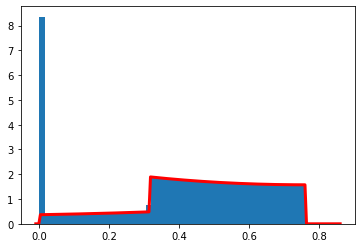

In [4]:
mu_S = rng.mean_similarity(beta, a, parameter_type='delay')

assert rho <= mu_S
k = rho/mu_S

x = np.linspace(-0.01, k+0.1, 200)
plt.hist(obs_weig, bins=50, density=True);
plt.plot(x, rng.pdf_conditional_probability(x, theta, beta, a, rho, 'delay'), 
         linewidth = 3, color = 'r')

In [5]:
max(obs_weig)/2

0.3803973120856049

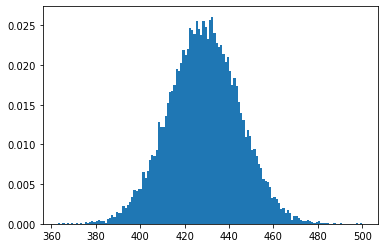

In [8]:
nb_bins = (max(obs_degs)-min(obs_degs))

plt.hist(obs_degs, bins=nb_bins, density=True);

In [9]:
p_bin = rng.expected_node_degree(theta, 
                                 a = a, 
                                 rho = rho, 
                                 parameter = beta, 
                                 parameter_type = 'delay')

v_bin = p_bin*(1-p_bin)*(N-1)

In [10]:
print(np.mean(obs_degs))
print(p_bin*(N-1))

428.22998046875
428.17258937153815


In [11]:
print(np.var(obs_degs))
print(v_bin)

252.80814414024354
248.96265165000557


In [12]:
print(scipy.stats.skew(obs_degs))
print((1-2*p_bin)/np.sqrt(v_bin))

-0.0022059708210009753
0.010324645476899482


# Compound distribution - all nodes

In [2]:
rho  = 0.225
beta = 0.832
a    = 0.292

In [98]:
N = 2**10
rho = np.random.uniform(0,0.25)
beta = np.random.uniform()
a = np.random.uniform(0,0.5)

In [214]:
N = 2**10

In [215]:
print(f"rho  = {rho :.3f}")
print(f"beta = {beta:.3f}")
print(f"a    = {a   :.3f}")

rho  = 0.046
beta = 0.573
a    = 0.191


## $\mathbf{\rho}$ distribution

$\mathbb{E}P = \rho$

In [238]:
ensembl_size = 2**10

obs_rhos = []

for i in range(ensembl_size):
    print(f"{100*i/ensembl_size:.2f}%", end='\r')
    delas = rng.get_delays(N, beta)
    dists = rng.delays_to_distances(delas)
    simis = rng.distances_to_similarities(dists, a=a)
    probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=beta, parameter_type = 'delay')
    degs = squareform(probs).mean(axis=0)

    obs_rhos.append(degs)

print("Average observed degree: " , np.mean(probs))
print("        Expected degree: " , rho)
print()
    
obs_rhos = np.array(obs_rhos).flatten()

Average observed degree:  0.04590924113072365
        Expected degree:  0.04615281979942637



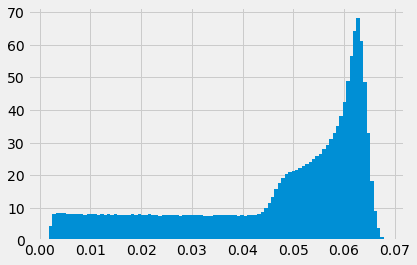

In [239]:
plt.hist(obs_rhos, bins=100, density=True);

In [240]:
@np.vectorize
def tmp1_f(x):
    return rng.expected_node_degree(x, 
                                    a = a, 
                                    rho = rho, 
                                    parameter = beta, 
                                    parameter_type = 'delay')

In [241]:
@np.vectorize
def tmp2_f(x):
    return rng.d_expected_node_degree(x, a, rho, beta, parameter_type = 'delay')

In [242]:
def get_maximum(a, parameter, parameter_type):
    rate = rng.get_rate_parameter(parameter=parameter, parameter_type=parameter_type)
    
    term = (2 + -np.exp(-rate * 2*a*PI)*(-np.exp(-rate * 2*PI) + 1)) / (1 - np.exp(-rate*2*PI))
    
    return np.log(term)/rate

def get_maximum(a, parameter, parameter_type):
    rate = rng.get_rate_parameter(parameter=parameter, parameter_type=parameter_type)
    
    def integral(theta):
        const = 1 - np.exp(-rate * 2*PI)

        term_A2 =  -np.exp(-rate * (2*PI - 2*a*PI))
        term_B1 =  -np.exp(-rate * 2*a*PI)  
        
        return np.exp(-rate*theta)*(2 + term_A2 + term_B1) - const
    
    return scipy.optimize.toms748(integral, 0, 2*a*PI)

In [243]:
def get_maximum(a, parameter, parameter_type):
    rate = rng.get_rate_parameter(parameter=parameter, parameter_type=parameter_type)
    term = (2 - np.exp(-rate * (2*PI - 2*a*PI)) - np.exp(-rate * 2*a*PI)) / (1 - np.exp(-rate*2*PI))
    return np.log(term)/rate

def get_minimum(a, parameter, parameter_type):
    rate = rng.get_rate_parameter(parameter=parameter, parameter_type=parameter_type)
    term = (np.exp(rate * 2*a*PI) + np.exp(-rate * (2*a*PI-2*PI)) - 2) / (1 - np.exp(-rate * 2*PI))
    return np.log(term)/rate

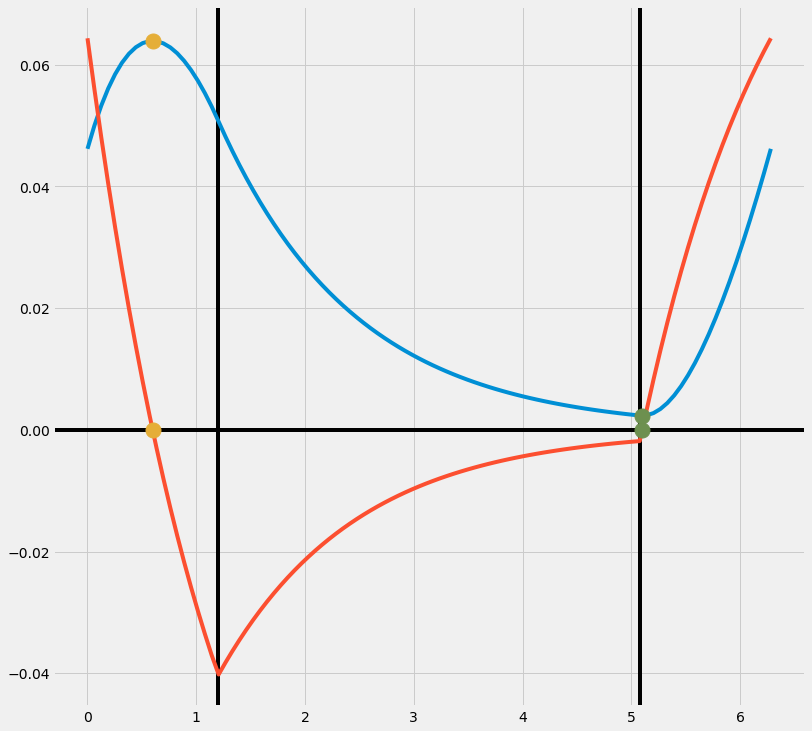

In [244]:
x = np.linspace(0,2*PI,100)
y1 = tmp1_f(x)
y2 = tmp2_f(x)

theta_max = rng.get_max_expectancy(a, parameter=beta, parameter_type='delay')
theta_min = rng.get_min_expectancy(a, parameter=beta, parameter_type='delay')

fig, ax = plt.subplots(figsize=(12,12))

ax.axhline(y=0, color='k')
ax.axvline(x=2*PI*a    , color='k')
ax.axvline(x=2*PI*(1-a), color='k')

ax.plot(x,y1)
ax.plot(x,y2)
ax.plot([theta_max, theta_max], [0,tmp1_f(theta_max)], 'o', markersize=15)
ax.plot([theta_min, theta_min], [0,tmp1_f(theta_min)], 'o', markersize=15)

In [245]:
def transformed_pdf(rho_i, a, rho, parameter, parameter_type = 'rate'):
    def costum_expected_node_degree(x):
        return rng.expected_node_degree(x, a=a, rho=rho, 
                                        parameter=parameter, parameter_type=parameter_type)
    def costum_d_expected_node_degree(x):
        return rng.d_expected_node_degree(x, a=a, rho=rho, 
                                          parameter=parameter, parameter_type=parameter_type)
    
    result = 0
    
    theta_max = rng.get_max_expectancy(a, parameter=beta, parameter_type='delay')
    theta_min = rng.get_min_expectancy(a, parameter=beta, parameter_type='delay')
    
    rho_max = costum_expected_node_degree(theta_max)
    rho_min = costum_expected_node_degree(theta_min)
    
    rho_left  = costum_expected_node_degree(0.)
    rho_right = costum_expected_node_degree(2*PI)
    
    
    if rho_left <= rho_i <= rho_max:
        theta = scipy.optimize.toms748(lambda x: tmp1_f(x)-rho_i, 0., theta_max)
        value = rng.pdf_delay(theta, parameter=parameter, parameter_type=parameter_type)
        result += value / abs(costum_d_expected_node_degree(theta))
        
    if rho_min <= rho_i <= rho_max:
        theta = scipy.optimize.toms748(lambda x: tmp1_f(x)-rho_i, theta_max, theta_min)
        value = rng.pdf_delay(theta, parameter=parameter, parameter_type=parameter_type)
        result += value / abs(costum_d_expected_node_degree(theta))
        
    if rho_min <= rho_i <= rho_right:
        theta = scipy.optimize.toms748(lambda x: tmp1_f(x)-rho_i, theta_min, 2*PI)
        value = rng.pdf_delay(theta, parameter=parameter, parameter_type=parameter_type)
        result += value / abs(costum_d_expected_node_degree(theta))
        
    return result

In [246]:
annotation_str = r"""$\rho = 0.225$
$\beta = 0.832$
$a = 0.292$
$N = 2^{10}$

#observed_nodes$ = 1\cdot N=1,024$"""

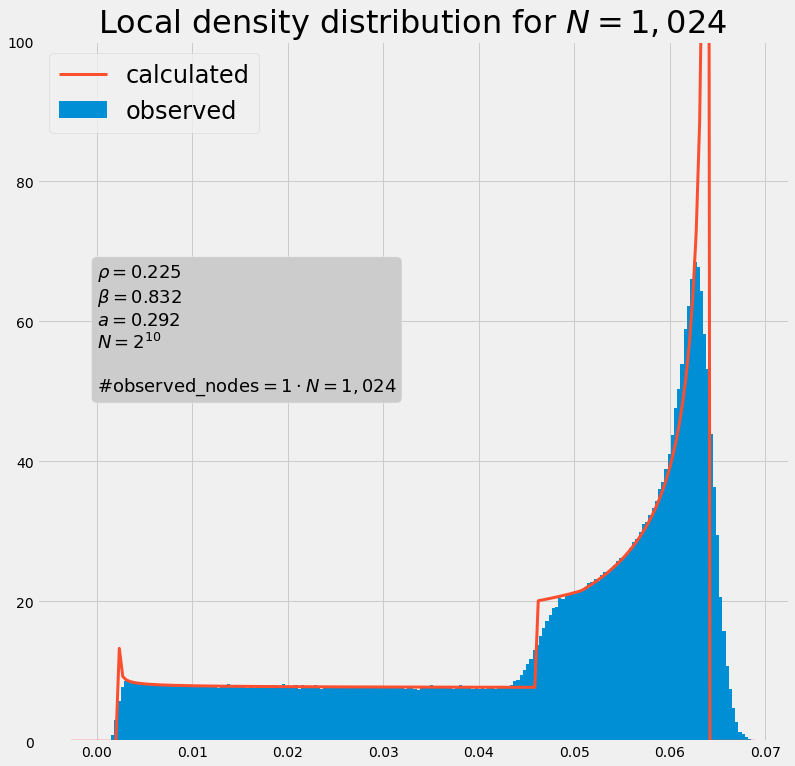

In [248]:
eps = 0.005
x = np.linspace(tmp1_f(theta_min)-eps, tmp1_f(theta_max)+eps,200)
y = [transformed_pdf(rho_i, a, rho, beta, parameter_type = 'delay') for rho_i in x]

fig, ax = plt.subplots(figsize=(12,12))

ax.hist(obs_rhos, bins=200, density=True, label='observed');
ax.plot(x, y, linewidth=3, label='calculated');
ax.set_ylim(0,100)
ax.set_title('Local density distribution for $N=1,024$', fontsize=32)
ax.legend(fontsize=24)
ax.annotate(annotation_str, (0,50), 
            fontsize=18, bbox=dict(boxstyle="round", fc="0.8"))
fig.savefig("/Users/markusyoussef/Desktop/ring_meeting/tmp.pdf")

In [249]:
len(obs_rhos)

1048576

In [19]:
delas = rng.get_delays(param=beta, parameter_type='delay', N=2**12)
rhos  = tmp1_f(delas)

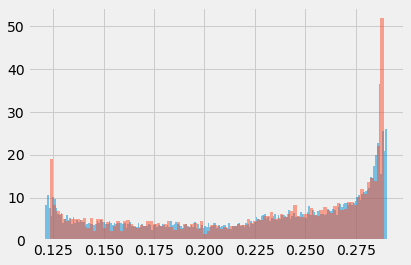

In [20]:
x = np.linspace(0, tmp1_f(theta_max)+0.1,100)
y = [transformed_pdf(rho_i, a, rho, beta, parameter_type = 'delay') for rho_i in x]

plt.hist(obs_rhos, bins=200, density=True, alpha=0.5);
plt.hist(rhos    , bins=100, density=True, alpha =0.5);

## degree distribution

In [21]:
print(f"rho  = {rho :.3f}")
print(f"beta = {beta:.3f}")
print(f"a    = {a   :.3f}")

rho  = 0.225
beta = 0.832
a    = 0.292


In [44]:
obs_degs = []
obs_weig = []

for i in range(1):
    for i in range(2**2):
        delas = rng.get_delays(N, beta)
        dists = rng.delays_to_distances(delas)
        simis = rng.distances_to_similarities(dists, a=a)
        probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=beta, parameter_type = 'delay')
        degs = squareform(probs > np.random.uniform(size=N*(N-1)//2)).sum(axis=0)
        
        obs_degs.append(degs)
        obs_weig.append(probs)
        
    print("Average observed degree: ", np.mean(degs))
    print("        Expected degree: ", rho*N)
    print()
    
obs_degs = np.array(obs_degs).flatten()
obs_weig = np.array(obs_weig).flatten()

Average observed degree:  1826.066162109375
        Expected degree:  1840.6726613749909



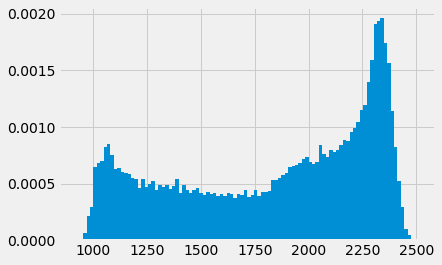

In [45]:
nb_bins = (max(obs_degs)-min(obs_degs))

plt.hist(obs_degs, bins=100, density=True);

In [54]:
exp_degs = np.array([scipy.stats.poisson.rvs((N-1)*rho_i) for rho_i in obs_rhos])

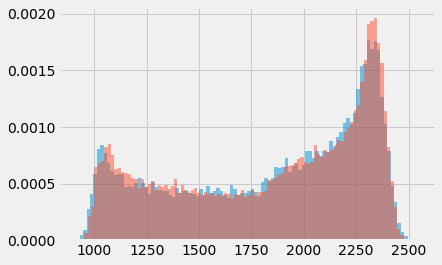

In [55]:
nb_bins = (max(exp_degs)-min(exp_degs))
nb_bins = (max(obs_degs)-min(obs_degs))

plt.hist(exp_degs, bins=100, density=True, alpha=0.5);
plt.hist(obs_degs, bins=100, density=True, alpha=0.5);

In [48]:
rho*(N-1)

1840.4479698880066

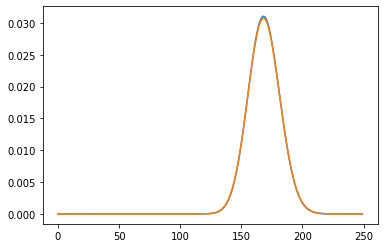

In [14]:
k = np.arange(0,250)

plt.plot(k,scipy.stats.binom.pmf(k, N-1, rho))
plt.plot(k,scipy.stats.poisson.pmf(k, rho*(N-1)))

In [25]:
def transformed_pdf(rho_i, a, rho, parameter, parameter_type = 'rate'):
    def costum_expected_node_degree(x):
        return rng.expected_node_degree(x, a=a, rho=rho, 
                                        parameter=parameter, parameter_type=parameter_type)
    def costum_d_expected_node_degree(x):
        return rng.d_expected_node_degree(x, a=a, rho=rho, 
                                          parameter=parameter, parameter_type=parameter_type)
    
    result = 0
    
    theta_max = rng.get_max_expectancy(a, parameter=beta, parameter_type='delay')
    theta_min = rng.get_min_expectancy(a, parameter=beta, parameter_type='delay')
    
    rho_max = costum_expected_node_degree(theta_max)
    rho_min = costum_expected_node_degree(theta_min)
    
    rho_left  = costum_expected_node_degree(0.)
    rho_right = costum_expected_node_degree(2*PI)
    
    
    if rho_left <= rho_i <= rho_max:
        theta = scipy.optimize.toms748(lambda x: costum_expected_node_degree(x)-rho_i, 0., theta_max)
        value = rng.pdf_delay(theta, parameter=parameter, parameter_type=parameter_type)
        result += value / abs(costum_d_expected_node_degree(theta))
        
    if rho_min <= rho_i <= rho_max:
        theta = scipy.optimize.toms748(lambda x: costum_expected_node_degree(x)-rho_i, theta_max, theta_min)
        value = rng.pdf_delay(theta, parameter=parameter, parameter_type=parameter_type)
        result += value / abs(costum_d_expected_node_degree(theta))
        
    if rho_min <= rho_i <= rho_right:
        theta = scipy.optimize.toms748(lambda x: costum_expected_node_degree(x)-rho_i, theta_min, 2*PI)
        value = rng.pdf_delay(theta, parameter=parameter, parameter_type=parameter_type)
        result += value / abs(costum_d_expected_node_degree(theta))
        
    return result

In [86]:
def deg_distribution(k, N, a, rho, parameter, parameter_type):
    nomin = np.exp(k*(1+np.log((N-1)/k)) - (N-1))
    denom = np.sqrt(2*PI*k)
    
    theta_max = rng.get_max_expectancy(a, parameter=beta, parameter_type='delay')
    theta_min = rng.get_min_expectancy(a, parameter=beta, parameter_type='delay')
    
    def costum_expected_node_degree(x):
        return rng.expected_node_degree(x, a=a, rho=rho, 
                                        parameter=parameter, parameter_type=parameter_type)
    
    rho_max = costum_expected_node_degree(theta_max)
    rho_min = costum_expected_node_degree(theta_min)
    
    integral = scipy.integrate.quad(lambda rho_i:
                                       rho_i**k * np.exp(-rho_i) * transformed_pdf(rho_i, a=a, rho=rho, 
                                                                                   parameter=parameter, 
                                                                                   parameter_type = parameter_type),
                                    rho_min, rho_max)[0]
    
    return integral*nomin/denom

In [60]:
scipy.stats.poisson.pmf(1000, (N-1)*rho)

1.053179807432864e-102

In [93]:
def deg_distribution2(k, N, a, rho, parameter, parameter_type):
    def costum_expected_node_degree(x):
        return rng.expected_node_degree(x, a=a, rho=rho, 
                                        parameter=parameter, parameter_type=parameter_type)
    
    theta_max = rng.get_max_expectancy(a, parameter=beta, parameter_type='delay')
    theta_min = rng.get_min_expectancy(a, parameter=beta, parameter_type='delay')
    
    rho_max = costum_expected_node_degree(theta_max)
    rho_min = costum_expected_node_degree(theta_min)
    
    return scipy.integrate.quad(lambda rho_i:
                                   transformed_pdf(rho_i, a, rho, 
                                                   parameter=parameter, 
                                                   parameter_type = parameter_type) * \
                                   scipy.stats.poisson.pmf(k, (N-1)*rho_i),
                                rho_min,rho_max)[0]

In [97]:
%%time

k = np.linspace(min((min(exp_degs), min(obs_degs))), 
                max((max(exp_degs), max(obs_degs))),
                10, dtype=int)

#degs1 = [deg_distribution( ki, N, a, rho, parameter=beta, parameter_type='delay') for ki in k]
degs2 = [deg_distribution2(ki, N, a, rho, parameter=beta, parameter_type='delay') for ki in k]

CPU times: user 20 s, sys: 70.7 ms, total: 20.1 s
Wall time: 20.1 s


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  app.launch_new_instance()


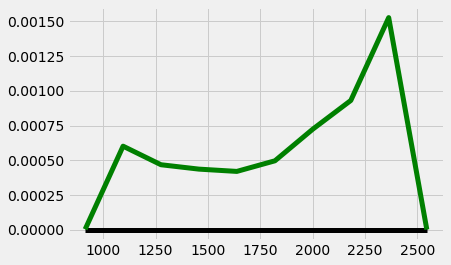

In [95]:
plt.plot(k, degs1, linewidth=5, c='k')
plt.plot(k, degs2, linewidth=5, c='g')

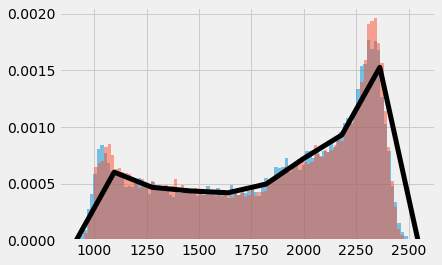

In [84]:
nb_bins = (max(exp_degs)-min(exp_degs))
nb_bins = (max(obs_degs)-min(obs_degs))

plt.hist(exp_degs, bins=100, density=True, alpha=0.5);
plt.hist(obs_degs, bins=100, density=True, alpha=0.5);

plt.plot(k, degs1, linewidth=5, c='k')
plt.plot(k, degs2, linewidth=5, c='g')

In [76]:
k = np.arange(250)
degs = [deg_distribution(ki, N=N, a=a, rho=rho, 
                                parameter=beta, parameter_type='delay') for ki in k]

NameError: name 'deg_distribution' is not defined

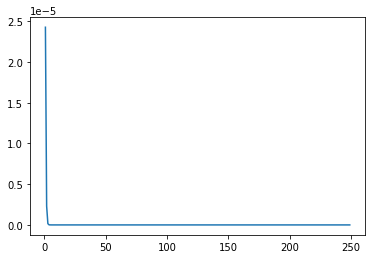

In [31]:
plt.plot(degs)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in long_scalars
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


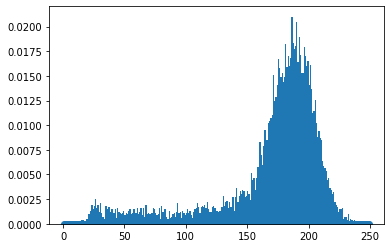

In [28]:
nb_bins = (max(obs_degs)-min(obs_degs))
plt.hist(obs_degs, bins=nb_bins, density=True);

plt.scatter(k, [deg_distribution(ki, N=N, a=a, rho=rho, 
                                parameter=beta, parameter_type='delay') for ki in k])